`
Topic:    Challenge Set 1
Subject:  Explore MTA turnstile data
Date:     01/23/2017
Name:     Prashant Tatineni
`

**Challenge 1**

In [1]:
import pandas as pd

In [2]:
wk1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_161224.txt')
wk2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_161231.txt')
wk3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170107.txt')
wk4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170114.txt')

In [3]:
wk1.columns = ['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','EXITS']
wk2.columns = ['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','EXITS']
wk3.columns = ['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','EXITS']
wk4.columns = ['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','EXITS']

In [9]:
MTA_dict = {}
for index, row in wk1.iterrows():
    MTA_dict.setdefault((row['C/A'],row['UNIT'],row['SCP'],row['STATION']),[]).append([row['LINENAME'],row['DIVISION'],row['DATE'],row['TIME'],row['DESC'],row['ENTRIES'],row['EXITS']])

In [14]:
MTA_dict['N134','R385','00-00-00','ROCKAWAY BLVD'][0:3]

[['A', 'IND', '12/17/2016', '00:00:00', 'REGULAR', 7586070, 2968637],
 ['A', 'IND', '12/17/2016', '04:00:00', 'REGULAR', 7586115, 2968663],
 ['A', 'IND', '12/17/2016', '08:00:00', 'REGULAR', 7586266, 2968726]]

**Challenge 2**

In [15]:
import dateutil

In [16]:
MTA_time = {}
for index, row in wk1.iterrows():
    MTA_time.setdefault((row['C/A'],row['UNIT'],row['SCP'],row['STATION']),[]).append([dateutil.parser.parse(row['DATE'] + ' ' + row['TIME']),row['ENTRIES']])

In [29]:
MTA_time['N134','R385','00-00-00','ROCKAWAY BLVD'][0:3]

[[datetime.datetime(2016, 12, 17, 0, 0), 7586070],
 [datetime.datetime(2016, 12, 17, 4, 0), 7586115],
 [datetime.datetime(2016, 12, 17, 8, 0), 7586266]]

**Challenge 3**

In [26]:
import datetime

MTA_date = {}
for key in MTA_time:
    newList = []
    for i in range(0,len(MTA_time[key]),6):
        if i+5 < len(MTA_time[key]):
            newList.append([MTA_time[key][i][0].date(), MTA_time[key][i+5][1] - MTA_time[key][i][1]])
    MTA_date[key] = newList

In [27]:
MTA_date['N134','R385','00-00-00','ROCKAWAY BLVD'][0:3]

[[datetime.date(2016, 12, 17), 781],
 [datetime.date(2016, 12, 18), 605],
 [datetime.date(2016, 12, 19), 1339]]

**Challenge 4**

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

In [31]:
dates = [i[0] for i in MTA_date['N134','R385','00-00-00','ROCKAWAY BLVD']]
counts = [i[1] for i in MTA_date['N134','R385','00-00-00','ROCKAWAY BLVD']]

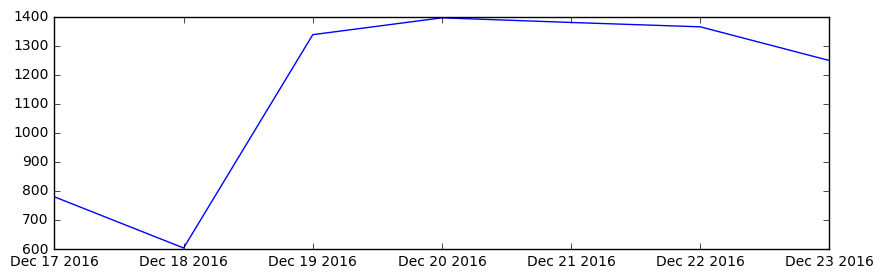

In [32]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

**Challenge 5**

In [162]:
MTA_date

{('A002', 'R051', '02-00-00', '59 ST'): [[datetime.date(2016, 12, 31), 1092],
  [datetime.date(2017, 1, 1), 797]]}

In [33]:
MTA_date_station = {}
for key in MTA_date:
    MTA_date_station.setdefault((key[0],key[1],key[3]),[]).append([key[2],MTA_date[key]])

In [35]:
MTA_date_station['N134','R385','ROCKAWAY BLVD'][0]

['00-00-00',
 [[datetime.date(2016, 12, 17), 781],
  [datetime.date(2016, 12, 18), 605],
  [datetime.date(2016, 12, 19), 1339],
  [datetime.date(2016, 12, 20), 1397],
  [datetime.date(2016, 12, 21), 1381],
  [datetime.date(2016, 12, 22), 1366],
  [datetime.date(2016, 12, 23), 1250]]]

**Challenge 6**

In [36]:
MTA_date_station_ts = {}
for key in MTA_date_station:
    ts = {}
    for turnstile in MTA_date_station[key]:
        for i in turnstile[1]:
            ts.setdefault(i[0],0)
            ts[i[0]] += i[1]
    MTA_date_station_ts[key] = ts

In [40]:
MTA_date_station_ts['N134','R385','ROCKAWAY BLVD']

{datetime.date(2016, 12, 17): 2467,
 datetime.date(2016, 12, 18): 1634,
 datetime.date(2016, 12, 19): 4024,
 datetime.date(2016, 12, 20): 4068,
 datetime.date(2016, 12, 21): 4131,
 datetime.date(2016, 12, 22): 3949,
 datetime.date(2016, 12, 23): 3666}

**Challenge 7**

In [49]:
dates = sorted(MTA_date_station_ts['N134','R385','ROCKAWAY BLVD'].keys())

In [51]:
counts = []
for date in dates:
    counts += [MTA_date_station_ts['N134','R385','ROCKAWAY BLVD'][date]]

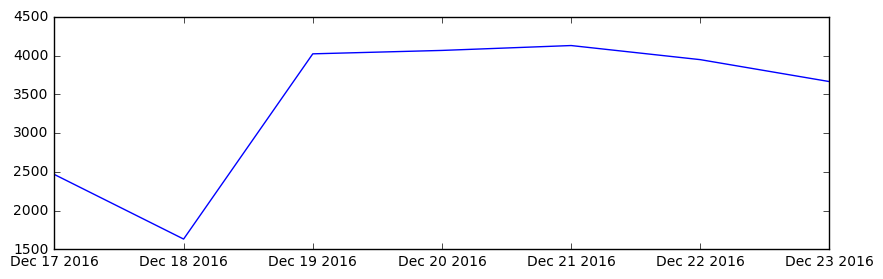

In [52]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

**Challenge 8**

In [58]:
# Week 1
MTA_wk1 = MTA_date_station_ts
week1 = []
for key in MTA_wk1['N134','R385','ROCKAWAY BLVD']:
    week1 += [MTA_wk1['N134','R385','ROCKAWAY BLVD'][key]]
    
# Week 2
MTA_time = {}
for index, row in wk2.iterrows():
    MTA_time.setdefault((row['C/A'],row['UNIT'],row['SCP'],row['STATION']),[]).append([dateutil.parser.parse(row['DATE'] + ' ' + row['TIME']),row['ENTRIES']])
MTA_date = {}
for key in MTA_time:
    newList = []
    for i in range(0,len(MTA_time[key]),6):
        if i+5 < len(MTA_time[key]):
            newList.append([MTA_time[key][i][0].date(), MTA_time[key][i+5][1] - MTA_time[key][i][1]])
    MTA_date[key] = newList
MTA_date_station = {}
for key in MTA_date:
    MTA_date_station.setdefault((key[0],key[1],key[3]),[]).append([key[2],MTA_date[key]])
MTA_wk2 = {}
for key in MTA_date_station:
    ts = {}
    for turnstile in MTA_date_station[key]:
        for i in turnstile[1]:
            ts.setdefault(i[0],0)
            ts[i[0]] += i[1]
    MTA_wk2[key] = ts
week2 = []
for key in MTA_wk2['N134','R385','ROCKAWAY BLVD']:
    week2 += [MTA_wk2['N134','R385','ROCKAWAY BLVD'][key]]

# Week 3
MTA_time = {}
for index, row in wk3.iterrows():
    MTA_time.setdefault((row['C/A'],row['UNIT'],row['SCP'],row['STATION']),[]).append([dateutil.parser.parse(row['DATE'] + ' ' + row['TIME']),row['ENTRIES']])
MTA_date = {}
for key in MTA_time:
    newList = []
    for i in range(0,len(MTA_time[key]),6):
        if i+5 < len(MTA_time[key]):
            newList.append([MTA_time[key][i][0].date(), MTA_time[key][i+5][1] - MTA_time[key][i][1]])
    MTA_date[key] = newList
MTA_date_station = {}
for key in MTA_date:
    MTA_date_station.setdefault((key[0],key[1],key[3]),[]).append([key[2],MTA_date[key]])
MTA_wk3 = {}
for key in MTA_date_station:
    ts = {}
    for turnstile in MTA_date_station[key]:
        for i in turnstile[1]:
            ts.setdefault(i[0],0)
            ts[i[0]] += i[1]
    MTA_wk3[key] = ts
week3 = []
for key in MTA_wk3['N134','R385','ROCKAWAY BLVD']:
    week3 += [MTA_wk3['N134','R385','ROCKAWAY BLVD'][key]]

# Week 4
MTA_time = {}
for index, row in wk4.iterrows():
    MTA_time.setdefault((row['C/A'],row['UNIT'],row['SCP'],row['STATION']),[]).append([dateutil.parser.parse(row['DATE'] + ' ' + row['TIME']),row['ENTRIES']])
MTA_date = {}
for key in MTA_time:
    newList = []
    for i in range(0,len(MTA_time[key]),6):
        if i+5 < len(MTA_time[key]):
            newList.append([MTA_time[key][i][0].date(), MTA_time[key][i+5][1] - MTA_time[key][i][1]])
    MTA_date[key] = newList
MTA_date_station = {}
for key in MTA_date:
    MTA_date_station.setdefault((key[0],key[1],key[3]),[]).append([key[2],MTA_date[key]])
MTA_wk4 = {}
for key in MTA_date_station:
    ts = {}
    for turnstile in MTA_date_station[key]:
        for i in turnstile[1]:
            ts.setdefault(i[0],0)
            ts[i[0]] += i[1]
    MTA_wk4[key] = ts
week4 = []
for key in MTA_wk4['N134','R385','ROCKAWAY BLVD']:
    week4 += [MTA_wk4['N134','R385','ROCKAWAY BLVD'][key]]

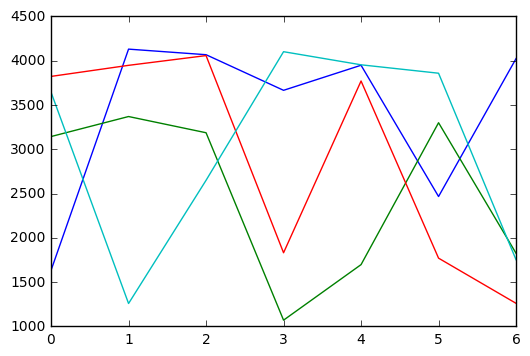

In [60]:
plt.plot(week1)
plt.plot(week2)
plt.plot(week3)
plt.plot(week4)

**Challenge 9**

In [64]:
total_ridership = {}
for station in MTA_wk1:
    total_ridership[station] = sum(MTA_wk1[station].values()) + sum(MTA_wk2[station].values()) + sum(MTA_wk3[station].values()) + sum(MTA_wk4[station].values())

**Challenge 10**

In [81]:
stations = total_ridership.keys()

In [82]:
counts = total_ridership.values()

In [118]:
total_ridership_counts = sorted(total_ridership.values())[19:-9]  # remove errors: negative and large positive values

(array([ 340.,  223.,   80.,   31.,   10.,    5.,    2.,    2.,    2.,    1.]),
 array([       0. ,   113678.8,   227357.6,   341036.4,   454715.2,
          568394. ,   682072.8,   795751.6,   909430.4,  1023109.2,
         1136788. ]),
 <a list of 10 Patch objects>)

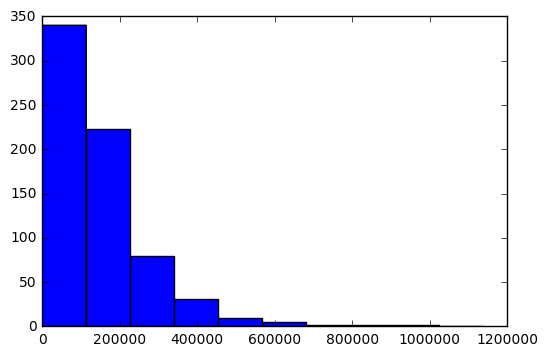

In [119]:
plt.hist(total_ridership_counts)